This notebook summarizes and implements results from [A geometric theory of non-local two-qubit operations](https://arxiv.org/pdf/quant-ph/0209120.pdf) by Zhang et al. .

### 1. Cartan decomposition and Weyl group

**Definition (Conjugation Map):** The **conjugation map** from the Lie group $G$ to $G$ given by $a_g(h) = ghg^{-1}$, where $g, h \in G$.

**Definition (Adjoint Representation):** The **adjoint representation** $\text{Ad}_g$ is a map from the Lie algebra $\mathfrak{g}$ to $\mathfrak{g}$ which is the differential of the conjugation map $a_g$. For matrix Lie algebras, $\text{Ad}_g(Y)=gYg^{-1}$ where $g \in G$ and $Y \in \mathfrak{g}$.

**Definition (Lie Bracket):** The differential of the adjoint representation $\text{ad}_X$ is a map from the lie algebra $\mathfrak{g}$ to $\mathfrak{g}$ given by the Lie bracket with $X$, that is, $\text{ad}_X(Y)=[X, Y]$, where $X, Y \in \mathfrak{g}$.

**Definition (Killing Form):** The inner product on $\mathfrak{g}$ is given by the **Killing form** $B(X, Y) = \text{tr}(\text{ad}_X\text{ad}_Y)$. Since $\text{ad}_X$ and $\text{ad}_Y$ are both linear maps, the Killing form is the trace of their composition.

**Definition (Structure Constants):** Let $\{X_1, ..., X_n\}$ be a basis for $\mathfrak{g}$. The numbers $C_{jk}^{i} \in \mathbb{C}$ such that

$$[X_j, X_k] = \sum_{i=1}^n C_{jk}^{i}X_i$$

are the **structure constants** of the Lie algebra $\mathfrak{g}$ with respect to the basis, where $j, k$ run from $1$ to $n$. Consider the vectorized expression

\begin{align}\text{ad}_{X_j}[X_1, ..., X_n] 
&= [\sum_{i=1}^n C_{j1}^{i}X_i, ..., \sum_{i=1}^n C_{jn}^{i}X_i] \\
&= [X_1, ..., X_n]\begin{bmatrix}C_{j1}^1 & \ldots & C_{jn}^1 \\ \vdots & & \vdots \\ C_{j1}^n & \ldots & C_{jn}^n \end{bmatrix}\end{align}

Note that $[X_j, X_k] = \sum_{i=1}^n C_{jk}^iX_i$. Then, to find the structure constant matrix, simplify compute all the Lie bracket and find the coordinates with respect to the basis. Hence, the matrix represenation of $\text{ad}_{X_j}$ with respect to the basis is 

\begin{bmatrix}C_{j1}^1 & \ldots & C_{jn}^1 \\ \vdots & & \vdots \\ C_{j1}^n & \ldots & C_{jn}^n \end{bmatrix}

Thus the Killing form $B(X_j, X_k)$ is $\sum_{a, b = 1}^n C_{jb}^a C_{ka}^b$, which is the $jk$-th enetry of the matrix of the quadratic form $B(, )$ or $x^T(\text{ad}_X\text{ad}_Y)x$. 

**Killing Form of $\mathfrak{su}(2^n)$:** From computing the structure constants $C^i_{jk}$, we can evaluate the Killing form

$$B(X_j, X_k) = \sum_{a=1}^{2^n-1} \sum_{b=1}^{2^n-1} C^a_{jb}C^b_{ka} = -2n \cdot \delta_{jk}$$

It is easy to verify that $\text{tr}(X_j X_k) = -\delta_{jk}$, thus the Killing form of $\mathfrak{su}(n)$ is $B(X, Y) = 2n\cdot \text{tr}(XY)$.

**Definition (Semisimple):** The Lie algebra $\mathfrak{g}$ is **semisimple** if and only if the Killing form is nondegenerate

**Defintion (Root):** Given a semisimple Lie algebra $\mathfrak{g}$ and its Cartan decomposition $\mathfrak{g} = \mathfrak{p} \oplus \mathfrak{l}$, let $\mathfrak{a}$ be a Cartan sublagebra of the pair $(\mathfrak{g}, \mathfrak{l})$. For all $H \in \mathfrak{a}$, let $X \in \mathfrak{g}$ be an eigenvector of $\text{ad}_H$ and $\alpha(H)$ the corresponding eigenvalue, i.e., 

$$\text{ad}_H(X) = [H, X] = \alpha(H) \cdot X = \langle \alpha, H \rangle \cdot X$$

The linear map $\alpha$ is called a **root** of $\mathfrak{g}$ with respect to $\mathfrak{a}$. In other words, $\langle \alpha, H \rangle$ are the eigenvalues of the matrix $\text{ad}_H$. 

Let $\Delta$ denote the set of nonzero roots, and $\Delta_{\mathfrak{p}} \subseteq \Delta$ denote the set of roots in which do not vanish identically on $\mathfrak{a}$:

\begin{align} \Delta &= \{\alpha \ : \ [H, X] = \alpha(H) \cdot X, \text{where } X \in \mathfrak{g}\} \\
\Delta_{\mathfrak{p}} &= \{\alpha \ : \ [H, X] = \alpha(H) \cdot X, \text{where } X \in \mathfrak{a}\}
\end{align}

**Definition (Centralizer):** The **centralizer** of $\mathfrak{a}$ in $K$ is the set 

$$M = \{k \in K : \text{Ad}_k(X) = X \text{ for each } X \in \mathfrak{a}\}$$

Since $kXk^{-1} = X$, this implies that $kX = Xk$. In other words, the **centralizer** is the set of elements in $K$ that commutes with everything in $\mathfrak{a}$.

**Definition (Normalizer):** The **normalizer** of $\mathfrak{a}$ in $K$ is the set 

$$M^{\prime} = \{k \in K : \text{Ad}_k(\mathfrak{a}) \subseteq \mathfrak{a}\}$$

In other words, the **normalizer** is the set of elements in $K$ whose $\mathfrak{a}$-adjoint action is closed in $\mathfrak{a}$.

**Definition (Weyl group):** The **Weyl group** $W(G, K)$ is the quotient group $M^\prime / M$. One can show that $W(G, K)$ is a finite group. This comes from the fact that $\mathfrak{g}$ is a finite dimensional vector space.

**Definition (Weyl chamber):** Each $\alpha \in \Delta_{\mathfrak{p}}$ defines a hyperplane $\alpha(X) = 0$ in the vector space $\mathfrak{a}$. These hyper planes divide the space $\mathfrak{a}$ into finitely many connected components, called the **Weyl chambers**.

**Proposition (Generation of the Weyl group)**: For each $\alpha \in \Delta_{\mathfrak{p}}$, let $s_\alpha$ denote the reflection with respect to the hyperplane $\alpha(X) = 0$ in $\mathfrak{a}$. The Weyl group is **generated** by the reflections $s_\alpha, \alpha \in \Delta_{\mathfrak{p}}$. This means that 

$$M^\prime / M \cong \langle\{s_\alpha: \alpha \in \Delta_\mathfrak{p} \}\rangle$$

### 2. Computing the Weyl Group $W(G, K)$

Each $H \in \mathfrak{a}$ can be written as a linear combination in the product operator basis, $H = \sum c_i E_i$. Let $\phi: \mathfrak{a}, B(, ) \to \mathbb{R}^3,  Dot(, )$ be the direct coordinate isomorphism, where $\phi(H) = [c_i]^T$. Observe that $\phi$ is angle preserving.

\begin{align}
B(H, K) 
&= B \big(\sum_{i}^n c_i E_i, \sum_j^n d_j E_j \big) \\
&= 2n \text{tr} \big(\sum_{i}^n c_i E_i \big)\big( \sum_j^n d_j E_j \big) \\
&= 2n \sum_{i, j}^n c_i d_j \text{tr}(E_iE_j) \\
&= 2n \sum_{i, j}^n c_i d_j \frac{n}{2} \delta_{ij} \\
&= n^2 \sum_{i, j}^n c_i d_i \\
&= n^2 Dot(\phi(H), \phi(K)) \\
&= n^2 \phi(H)^T\phi(K)
\end{align}

Thus, for a root $\alpha \in \Delta_\mathfrak{p}$, the hyperplane $\{H: B(\alpha, H) = 0\}$ is in direct correspondence with $\{h: \phi(\alpha)^T h\}$. Now, let us compute the Weyl group $W(G, K)$.

Let $h = \phi(H) = [c_1, c_2, c_3]^T$. The eigenvalues of the matrix $\text{ad}_H$ are

\begin{align}
\sigma_\mathfrak{p} = \ &i\{c_1-c_2, -c_1-c_2, -c_1-c_3, c_1-c_3, c_2-c_3, c_2+c_3, \\
&-c_1+c_2, c_1+c_2, c_1+c_3, -c_1+c_3, -c_2+c_3, -c_2-c_3\}
\end{align}

Using the computation of the Killing form on linear combinations of product operator basis above we can find the corresponding root system:

\begin{align}
\phi(\Delta_\mathfrak{p}) = \ &i\{[1, -1, 0]^T, [-1, -1, 0]^T, [-1, 0, -1]^T, [1, 0, -1]^T, [0, 1, -1]^T, [0, 1, 1]^T, \\
&[-1, 1, 0]^T, [1, 1, 0]^T, [1, 0, 1]^T, [-1, 0, 1]^T, [0, -1, 1]^T, [0, -1, -1]^T\}
\end{align}

The reflection of $h = [c_1, c_2, c_3]^T$ with respect to the plane $\langle\phi(\alpha), h\rangle = 0$ is 

$$s_{\phi(\alpha)}(h) = h - 2\frac{\phi(\alpha)^Th}{||\phi(\alpha)||^2} \cdot \phi(\alpha)$$

The derivation for this formula follows from vector projection. Let $u, v$ be non-zero vector. Suppose we want to reflect $v$ by the hyperplane orthogonal to $u$. Intuitively, we can decompose $v$ into two components: one perpendicular and one parallel to $u$.

$$v = v_{\perp} + v_{\parallel}$$

Using vector projection, we can find $v_\parallel$

$$v_\parallel = \frac{u^T v}{\parallel u \parallel^2} u$$

Then the reflection of $v$ is 

\begin{align}
v_\text{r} 
&= v_{\perp} - v_{\parallel} \\
&= v - 2v_{\parallel} \\
&= v - 2\frac{u^T v}{\parallel u \parallel^2} u \\
&= v - 2\frac{u u^T}{\parallel u \parallel^2} v \\
&= \big( I - 2\frac{u u^T}{\parallel u \parallel^2} \big) v
\end{align}

We call $\big( I - 2\frac{u u^T}{\parallel u \parallel^2} \big)$, the reflection matrix by the plane orthogonal to $u$. Recall the diffusion operator in Grover's search algorithm! 

From here, we can compute all the reflections $s_\sigma$ as follows:

\begin{align}
s_{i(-c_2+c_3)}(h) = [c_1, c_3, c_2]^T, \quad s_{i(c_2+c_3)}(h) = [c_1, -c_3, -c_2]^T \\
s_{i(-c_1+c_2)}(h) = [c_2, c_1, c_2]^T, \quad s_{i(c_1+c_2)}(h) = [-c_2, -c_1, c_3]^T \\
s_{i(-c_3+c_1)}(h) = [c_3, c_2, c_1]^T, \quad s_{i(c_1+c_3)}(h) = [-c_3, c_2, -c_1] ^T\\
\end{align}

The reflections $s_\alpha$ are equivalent to either permutations of the elements of $[c_1, c_2, c_3]^T$, or permutations with sign flips of two elements.

### 3. Non-Local Operations

**Definition (Locally equivalent):** Two unitary $U, U_1 \in SU(4)$ are called **locally equivalent** if they differ only by local operations: $U = k_1U_1k_2$, where $k_1, k_2 \in SU(2) \otimes SU(2)$ are local gates. This clearly defines an equivalence relation on the Lie group $SU(4)$

From the Cartan decomposition of $\mathfrak{su}(4)$, any two-qubit gate $U \in SU(4)$ can be written in the following form

$$U = k_1Ak_2 = k_1 \cdot \exp \big\{ \frac{i}{2}(c_1\sigma_x^{1, 2} + c_2 \sigma_y^{1, 2} + c_3 \sigma_z^{1, 2}) \big\} \cdot k_2$$

where $k_1, k_2 \in SU(2) \otimes SU(2)$.

Consider the the magic-basis transform

$$U_B = Q^\dagger U Q = Q^\dagger k_1 Ak_2 Q$$

where

$$Q = \frac{1}{\sqrt 2}\begin{pmatrix} 1 & 0 & 0 & i \\ 0 & i & 1 & 0 \\
0 & i & -1 & 0 \\ 1& 0 & 0 & -i \end{pmatrix}$$

Observe the effect on the Cartan subalgebra $\mathfrak{a}$

\begin{align}
Q^\dagger A Q 
&= Q^\dagger \exp \big\{\frac{i}{2}(c_1 \sigma_x^{1, 2} + c_2 \sigma_y^{1, 2} + c_3 \sigma_z^{1, 2}) \big\} Q \\
&= \exp \big\{\frac{i}{2}(c_1 Q^\dagger \sigma_x^{1, 2}Q + c_2 Q^\dagger\sigma_y^{1, 2}Q + c_3 Q^\dagger \sigma_z^{1, 2} Q) \big\} \\
&= \exp \big\{ \frac{i}{2} (c_1 \sigma_z^1 - c_2\sigma_z^2 + c_3\sigma_z^{1, 2}) \big\} \\
&= \text{diag} \{ e^{i\frac{c_1-c_2+c_3}{2}}, e^{i\frac{c_1+c_2-c_3}{2}}, e^{-i\frac{c_1+c_2+c_3}{2}}, e^{i\frac{-c_1+c_2+c_3}{2}} \}
\end{align}

Since conjugation under $Q$ forms a homomorphism between $SO(4)$ and $SU(2) \otimes SU(2)$, $U_B$ can be written as 

$$U_B = O_1 Q^\dagger A Q O_2$$

where $O_1, O_2 \in SO(4)$.



Let 

$$m = U_B^TU_B = O_2^T Q^\dagger A^2 Q O_2 $$

The complete set of local invariants of a two-qubit gate $U\in SU(4)$ is given by the spectrum of the matrix $m$, and hence by the eigenvalues of $A^2$.

$$\{ e^{i(c_1-c_2+c_3)}, e^{i(c_1+c_2-c_3)}, e^{-i(c_1+c_2+c_3)}, e^{i(-c_1+c_2+c_3)} \}$$

Hence, the complete set of local invariants of a two-qubit gate $U \in SU(4)$ is given by the spectrum of the matrix $m$. 

Since $A$ is unitary and $\det m = 1$, the characteristic polynomial of $m$ is then

$$|sI - m| = s^4-\text{tr}(m)s^3 + \frac{1}{2}\big(\text{tr}^2(m)-\text{tr}(m^2)\big)s^2 - \overline{\text{tr}(m)}s+1$$

This is computed by the [Cayley-Hamilton](https://en.wikipedia.org/wiki/Determinant#Relation_to_eigenvalues_and_trace) theorem.

Therefore the spectrum of $m$ is complete determined by only the two quantities $\text{tr}(m)$ and $\text{tr}^2(m) - \text{tr}(m^2)$. However, since $\text{tr}(m)$ is complex and $\text{tr}^2(m) - \text{tr}(m^2)$ is real, we are able to capture all three parameters $c_1, c_2, c_3$ as local invariants. For a two-qubit special unitary
$U$, its local invariants can be derived as 

$$\text{tr}(m) = 4 \cos c_1 \cos c_2 \cos c_3 + 4i \sin c_1 \sin c_2\sin c_3$$

$$\text{tr}^2(m) - \text{tr}(m^2) = 16\cos^2 c_1 \cos^2 c_2 \cos^2 c_3- 16\sin^2 c_1 \sin^2 c_2 \sin^2 c_3 - 4\cos 2 c_1 \cos 2c_2 \cos 2c_3$$

Now for an arbitrary $U \in U(4)$, we can decompose it as a product of $U_1 \in SU(4)$ and a global phase shift $e^{i\alpha}$, where $\det U = e^{4i\alpha}$. It follows that $m(U_1) = e^{-2i\alpha}m(U)$. Thus, the the global phase does not affect the entangling properies. The local invariants of a two-qubit unitary $U$ is then given by

$$G_1 = \frac{\text{tr}^2(m(U))}{16\det U}$$

$$G_2 = \frac{\text{tr}^2(m(U)) - \text{tr}(m^2(U))}{16 \det U}$$

For $G_1$, we square the trace so the global phase cancels out. Explicitly, in terms of $c_k$ parameters, 

$$G_1 = \cos^2c_1 \cos^2 c_2 \cos^2 c_3 - \sin^2 c_1 \sin^2 c_2 \sin^2 c_3 + \frac{i}{4}\sin2c_1 \sin2c_2 \sin 2c_3$$

$$G_2 = \cos^2c_1 \cos^2 c_2 \cos^2 c_3 - \sin^2 c_1 \sin^2 c_2 \sin^2 c_3 - \frac{1}{4}\cos2c_1 \cos2c_2 \cos 2c_3$$

Because the local invariants $G_1, G_2$ characterize the non-local properties of untiary operations, we can use these two invariants to chck whether a pair of two-qubit gates are locally equivalent. Analytically, we can also use them to find the parameters $c_1, c_2, c_3$.

\begin{align}\Re(G_1) &= \cos^2c_1 \cos^2 c_2 \cos^2 c_3 - \sin^2 c_1 \sin^2 c_2 \sin^2 c_3 \\
\Im(G_1) &= \frac{i}{4}\sin2c_1 \sin2c_2 \sin 2c_3 \\
G2 - \Re(G_1) &= - \frac{1}{4}\cos2c_1 \cos2c_2 \cos 2c_3 \end{align}

**Minimum positive period:** Since $G_1, G_2$ are functions of $\cos^2(c_k), \sin^2(c_k), \cos(2c_k)$, and $\sin(2c_k)$, they have a **minimum postive period** of $\pi$. For example, this means that $[c_1, c_2, c_3] \sim [c_1+\pi, c_2, c_3]$.

Thus, the geometric structure of $[c_1, c_2, c_3]$ is a $3$-Torus, $T^3 = S^1 \times S^1 \times S^1$, where $S^1 = [0, \pi)$.

### 4. Geometric Representation of Two-Qubit Gates

We make use of two correspondences:

$$\text{Lie algebra orbit} \longrightarrow \text{Weyl group orbit} \longrightarrow \text{Weyl chamber orbit}$$

Using the isomorphism $T^3 \cong \mathbb{R}^3 / \pi\mathbb{Z}^3$, we can map points from the $3$-Torus directly on a cube with side length $\pi$. Every point in this cube corresponds to a local equivalence class. However, different points in the cube may belong to the same local equivalence class. 

From the Lie group representation theory, the orbits of local gates $K$ acting on $SU(4)/ SU(2) \otimes SU(2)$ are in one-to-one correspondence with the orbits of the Weyl group $W(G, K)$ on $\mathfrak{a}$ (Thm 2.22 Helgason). From above, the Weyl group $W(G, K)$ is generated by the reflections $s_\alpha$. Therefore, if $[c_1, c_2, c_3]$ is an element in a local equivalence class $[U]$, then $[c_i, c_j, c_k]$, $[c_i, \pi - c_j, \pi - c_k]$, $[\pi-c_i, c_j, \pi - c_k]$, and $[\pi-c_i, \pi-c_j, c_k]$ are also in $[U]$, where $(i, j, k)$ is a permutation of $(1, 2, 3)$. We later use this fact to derive an algorithm for unique representation of coordinates.

Since each point of the Weyl group $W(G, K)$ on $\mathfrak{a}$ contains precisely one point in a Weyl chamber, the local equivalence classes of two-qubit gates are in one-to-one correspondence with the points on a Weyl chamber. Hence each Weyl chamber contains all the local equivalence classes. We can obtain Weyl chambers by dividing the cube by the hyperplanes $\alpha(H) = 0$, where $\alpha \in \Delta_\mathfrak{p}$:

\begin{align}
\{X \in \mathfrak{a}: c_2 - c_3 = 0\}, \ \{X \in \mathfrak{a}: c_2 + c_3 = \pi\} \quad (1, 2)\\
\{X \in \mathfrak{a}: c_1 - c_3 = 0\}, \ \{X \in \mathfrak{a}: c_1 + c_3 = \pi\} \quad (3, 4)\\
\{X \in \mathfrak{a}: c_1 - c_2 = 0\}, \ \{X \in \mathfrak{a}: c_1 + c_2 = \pi\} \quad (5, 6)\\
\end{align}

These conditions are obtained simplify by taking the dot product of the individual roots and the coordinates. For examples, vectors $[c_1, c_2, c_3]$ that is perpendicular to the root $[1, 0, -1]$ satisfy

$$\begin{pmatrix}c_1 \\ c_2 \\ c_3 \end{pmatrix} \cdot \begin{pmatrix}1 \\ 0 \\ -1 \end{pmatrix} = c_1 - c_3 = 0$$

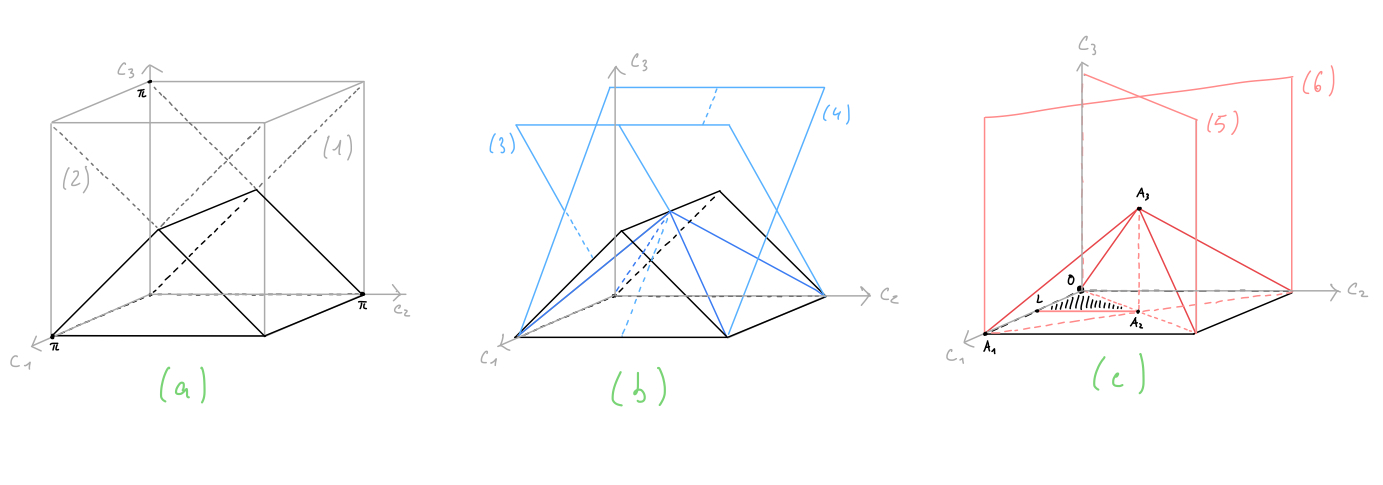

Here we show the symmetric-reduction process. In step (a), we divide the cube by plane 1 and 2 along the $c_2c_3$-direction and end up with a triangular prism. In step (b), we divide the triangular prism by plane 3 and 4 along the $c_1c_3$-direction and end up with a square pyramid. Finally, in step (c), we divide the pyramid by plane 5 and 6 along the $c_1c_2$-direction and end up with the desired tetrahedron $OA_1 A_2 A_3$. After diving the cube by the above six planes, we end up with 24 connected components. Each has a volume of $\pi^3/24$.

Notice that for any point $[c_1, c_2, 0]$ on the base of this tetrahedron, its mirror image with respect to the line $LA_2$, which is $[\pi-c_1, c_2, 0]$, corresponds to the same local equivalence class. Therefore, with the caveat that the basal areas $LA_1A_2$ and $OLA_2$ are identified as equivalent, we identify the tetrahedron $OA_1A_2A_3$ as a Weyl chamber, and denote this $\mathfrak{a}^+$.

In [ ]:
G1 = cos(c1)**2 * cos(c2)**2 * cos(c3)**2 - sin(c1)**2 * sin(c2)**2 * sin(
    c3)**2 + I / 4 * sin(2 * c1) * sin(2 * c2) * sin(2 * c3)
G2 = cos(c1)**2 * cos(c2)**2 * cos(c3)**2 - sin(c1)**2 * sin(c2)**2 * sin(
    c3)**2 - 1 / 4 * cos(2 * c1) * cos(2 * c2) * cos(2 * c3)

In [ ]:
G1.subs([(c1, c1), (c2, c3), (c3, c2)])

### 5. Algorithm for Computing Canonical Class Vector

In this section, we show how given an arbitrary set of coordinates $[c_1, c_2, c_3]$, we could correspond them directly onto points inside the Weyl tetrahedron $OA_1A_2A_3$. The high level details are provided by [Tucci](https://arxiv.org/abs/quant-ph/0507171), although we offer some additional details on their derivation as well as their implementation.

The following 3 operations preserve local invariants. The first comes from the $\pi$-periodicity in each argument $c_k$ of $G_1$ and $G_2$.

1. (Shift) Suppose we shift $\vec{c}$ by an integer multiple of $\pi$ along any of its 3 components. For example, a positive, $\pi$, X-shift would map

$$[c_1, c_2, c_3] \to [c_1+\pi, c_2, c_3]$$

This operation preserves local invariants because 

$$\exp{\frac{i}{2}\big[(c_1+\pi) \sigma_x^{1, 2} + c_2 \sigma_y^{1, 2} + c_3 \sigma_z^{1, 2}\big]} = i\sigma_x^{1, 2} \cdot \exp{\frac{i}{2}\big[c_1 \sigma_x^{1, 2} + c_2 \sigma_y^{1, 2} + c_3 \sigma_z^{1, 2}\big]}$$

The next two operations correspond to reflections or composition of reflections $s_\alpha$ in the Weyl chamber.

2. (Swap) Suppose we swap any two components $\vec{c}$. For, example, an XY-swap would map

$$[c_1, c_2, c_3] \to [c_2, c_1, c_3]$$

This operation preserves local invariants because

$$\exp{\frac{i}{2}\big[\mathbf{c_2} \sigma_x^{1, 2} + \mathbf{c_1} \sigma_y^{1, 2} + c_3 \sigma_z^{1, 2}\big]} = \exp -\frac{i\pi}{4} \big(\sigma_z^1 + \sigma_z^2 \big) \cdot  \exp{\frac{i}{2}\big[c_1 \sigma_x^{1, 2} + c_2 \sigma_y^{1, 2} + c_3 \sigma_z^{1, 2}\big]} \cdot \exp \frac{i\pi}{4} \big(\sigma_z^1 + \sigma_z^2 \big)$$

This comes from the fact that $G_1, G_2$ are made up of products of functions identical on $c_k$. Since complex multiplication is commutative, the swap operation preserves local invariants. Recall that the swap operation correspond to a class of reflections $s_\alpha$ in the Weyl chambers (permutations of the elements).

3. (Reverse) Suppose we reverse the sign of any two components $\vec{c}$. For example, an $XY$-reversal would map

$$[c_1, c_2, c_3] \to [-c_1, -c_2, c_3]$$

This operation preserves local invariant because

$$\exp{\frac{i}{2}\big[\mathbf{-c_1} \sigma_x^{1, 2} + \mathbf{-c_2} \sigma_y^{1, 2} + c_3 \sigma_z^{1, 2}\big]} = \sigma_z^1 \cdot \exp{\frac{i}{2}\big[c_1 \sigma_x^{1, 2} + c_2 \sigma_y^{1, 2} + c_3 \sigma_z^{1, 2}\big]} \cdot \sigma_z^1$$

On $G_1, G_2$, the sign flips has no effects in cosine or squared term. Furthermore, double sign flips cancel with each other in sine terms by oddness. Thus it preserves local invariant. More generally, the reverse operation is a composition of a permutation reflection $s_\alpha$ and a permutation with sign flips reflection $s_\beta$ of the same two elements as $s_\alpha$. 

From our derivation of the Weyl chamber, we start with a cube of side length $\pi$. Each plane we introduce divde the previous set into two connected parts. The tetrahedron $OA_1A_2A_3$ comes from choosing the lower set in each step. In other words, the $OA_1A_2A_3$ is the intersection of the following sets in $\mathfrak{a}$:

\begin{align}OA_1A_2A_3 = \underbrace{[0, \pi]}_{\pi\text{-cube}} {}^3 &\cap \underbrace{\{c_2 - c_3 \geq 0\}}_{\text{plane } 1} \cap \underbrace{\{c_2 + c_3 \leq \pi\}}_{\text{plane } 2} \cap \underbrace{\{c_1 - c_3 \geq 0\}}_{\text{plane } 3} \cap \underbrace{\{c_1 + c_3 \leq \pi\}}_{\text{plane } 4} \cap \underbrace{\{c_1 - c_2 \geq 0\}}_{\text{plane } 5} \cap \underbrace{\{c_1 + c_2 \leq \pi\}}_{\text{plane } 6}
\end{align}

Rearranging the inequalities of plane 1, 3, 5, we get the following constraints

$$0 \leq c_3 \leq c_2 \leq c_1 < \pi$$

The upper bound comes from the periodicity of the 3-Torus. Combining the first constraint with the inequalities of plane 2, 4, 6, we get our second contraint

$$c_1 + c_2 \leq \pi$$

Finally, to account for the exception of the base, we have one last constraint 

$$\text{If } c_3 = 0, \text{then } c_1 \leq \frac{\pi}{2}$$

These three constraints constitute our completion criteria.

We can now give an algorithm for computing the canonical class vector. 

1. Make $c_1, c_2, c_3 \in [0, \pi)$ by repeatedly shifting by $\pi$.
2. Make $c_1 \geq c_2 \geq c_3$ by swapping the components of $\vec{c}$.
3. Perform this step if at this point $c_1+c_2 \geq \pi$. Transform 

$$[c_1, c_2, c_3] \to [\pi - c_2, \pi - c_1, c_3]$$

At this point, $c_1 \geq c_2$, but $c_3$ may be larger than $c_1$ or $c_2$, so finish this step by swapping coordinates until $c_1 \geq c_2 \geq c_3$ again.
4. Perform this step if at this point $c_3 = 0$ and $c_1 > \frac{\pi}{2}$. Transform 

$$[c_1, c_2, 0] \to [\pi - c_1, c_2, 0]$$